In [203]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 1
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

In [204]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from tensorflow.keras import backend as clear
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [205]:
data = pd.read_csv('/content/drive/MyDrive/RNN/GOLD.csv')

data.head()

,Date,Y
0,2020/5/27,23.920000
1,2020/5/28,23.950001
2,2020/5/29,24.000000
3,2020/6/1,24.780001
4,2020/6/2,23.950001


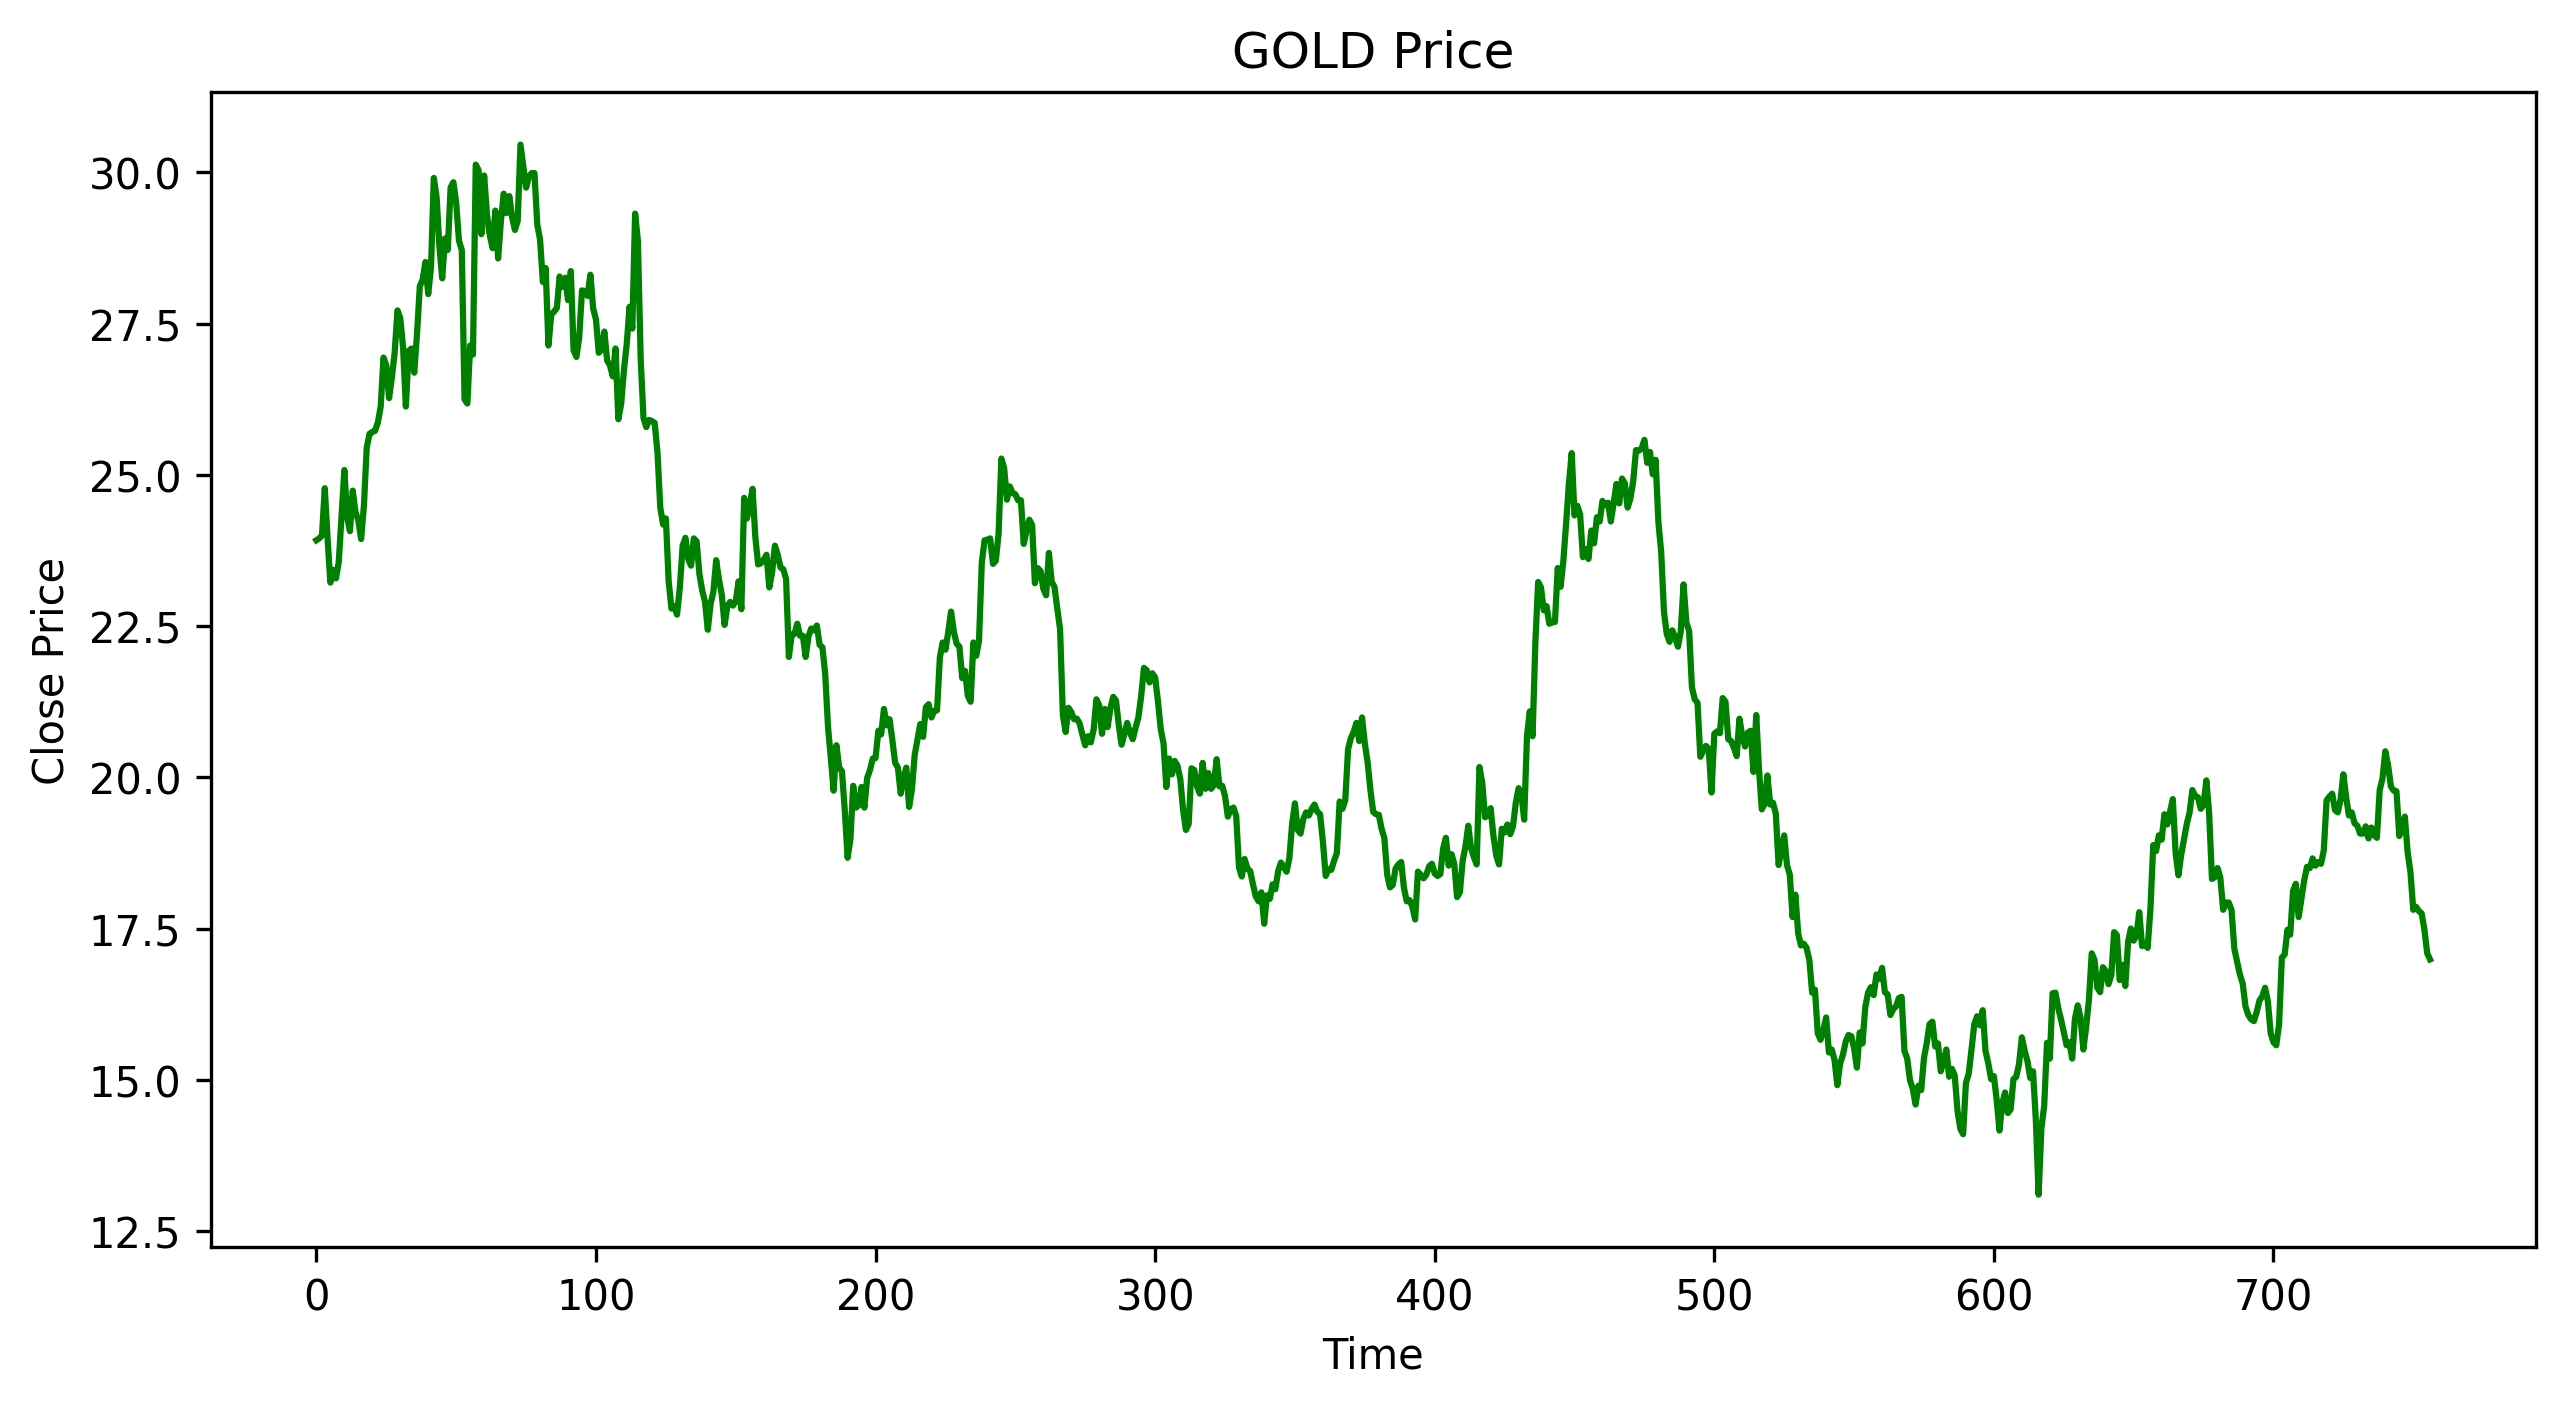

In [206]:
data=data['Y']
plt.figure(figsize=(10,5),dpi=300)
plt.plot(data, color ='green');
plt.ylabel('Close Price')
plt.title('GOLD Price')
plt.xlabel('Time')
plt.show()

In [207]:

split =int(0.8*data.shape[0])
Train,Test  = data[0:split] , data[split:]

val_split=int(0.8*Train.shape[0])
Train,Val=Train[0:val_split] , Train[val_split:]
Val=Val.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [208]:
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set= Train.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)
val_set= Val.values.reshape(-1,1)
val_set_scaled = sc.transform(val_set)
test_set = Test.values.reshape(-1,1)
test_set_scaled = sc.transform(test_set)

X_train = [] 
y_train = []
for i in range(5,len(train_set)):
    X_train.append(training_set_scaled[i-5:i]) 
    y_train.append(training_set_scaled[i]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

X_val = [] 
y_val = []
for i in range(5,len(val_set)):
    X_val.append(val_set_scaled[i-5:i]) 
    y_val.append(val_set_scaled[i]) 
X_val, y_val = np.array(X_val), np.array(y_val) 
X_val = np.reshape(X_val,(X_val.shape[0], X_val.shape[1], 1))

X_test = []
y_test = []
for i in range(5,len(test_set)):
    X_test.append(test_set_scaled[i-5:i]) 
    y_test.append(test_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test) 
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

In [209]:
X_train[0]

array([[0.49223606],
       [0.49456533],
       [0.49844724],
       [0.55900633],
       [0.49456533]])

## Build model & Compile & Fit

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
keras.backend.clear_session()
model = Sequential()
model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 32,activation='relu'))
model.add(Dense(units = 1))
model.summary()
opt=Adam(learning_rate=0.001,beta_1=0.97)
model.compile(optimizer = opt, loss = 'mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 dropout (Dropout)           (None, 5, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


## Plot the history of training and validation

In [211]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32,validation_data=(X_val,y_val))

Epoch 1/100
15/15 [==============================] - 5s 80ms/step - loss: 0.1750 - val_loss: 0.0372
Epoch 2/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0461 - val_loss: 0.0998
Epoch 3/100
15/15 [==============================] - 0s 19ms/step - loss: 0.0371 - val_loss: 0.0635
Epoch 4/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0202 - val_loss: 0.0374
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0239 - val_loss: 0.0372
Epoch 6/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0102 - val_loss: 0.0431
Epoch 7/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0113 - val_loss: 0.0332
Epoch 8/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0071 - val_loss: 0.0269
Epoch 9/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0073 - val_loss: 0.0262
Epoch 10/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0061 - val_loss: 0.0259

In [212]:
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'val_loss'])

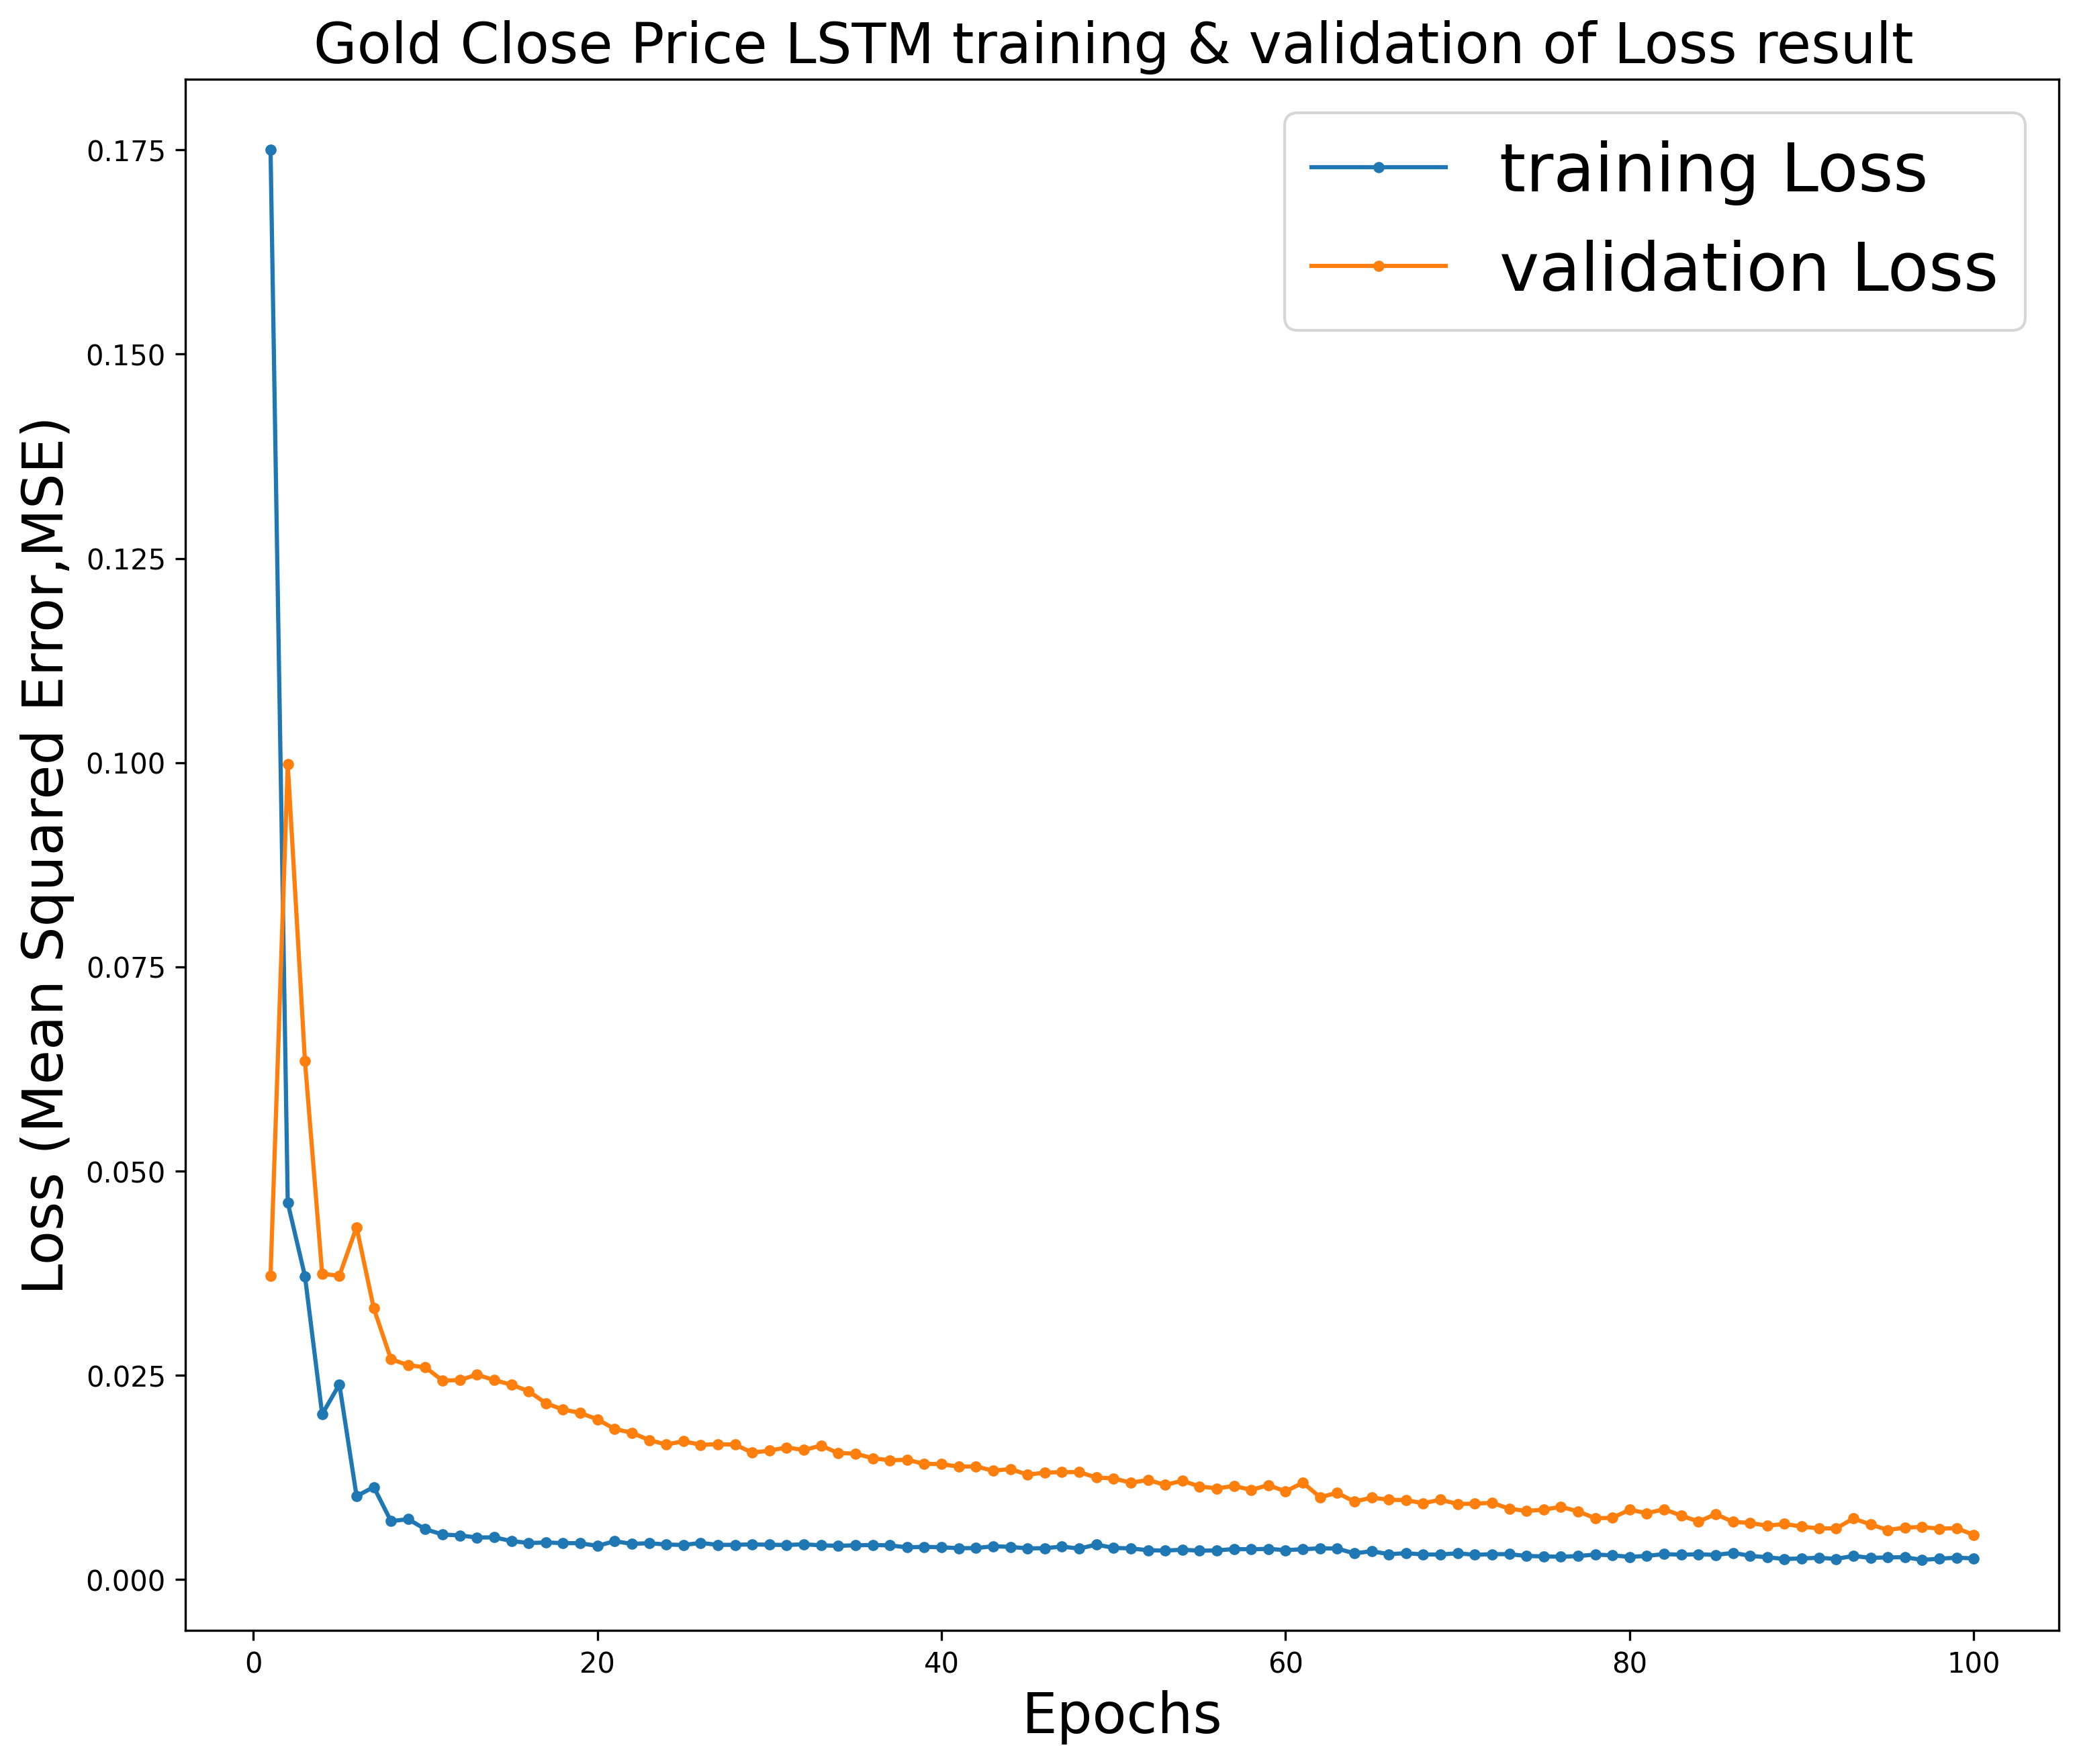

In [213]:
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Mean Squared Error,MSE)',fontsize=20)
plt.title('Gold Close Price LSTM training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

In [214]:
predicted_price = model.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_price = sc.inverse_transform(predicted_price)
actual_price = sc.inverse_transform(y_test)

5/5 [==============================] - 0s 4ms/step


In [215]:
df1 = pd.DataFrame(predicted_price)
df2 = pd.DataFrame(actual_price)

df1.columns = ['Pred']
df2.columns = ['Actual']

merged_df = pd.concat([df1, df2], axis=1)
merged_df.to_csv('output2.csv', index=False)

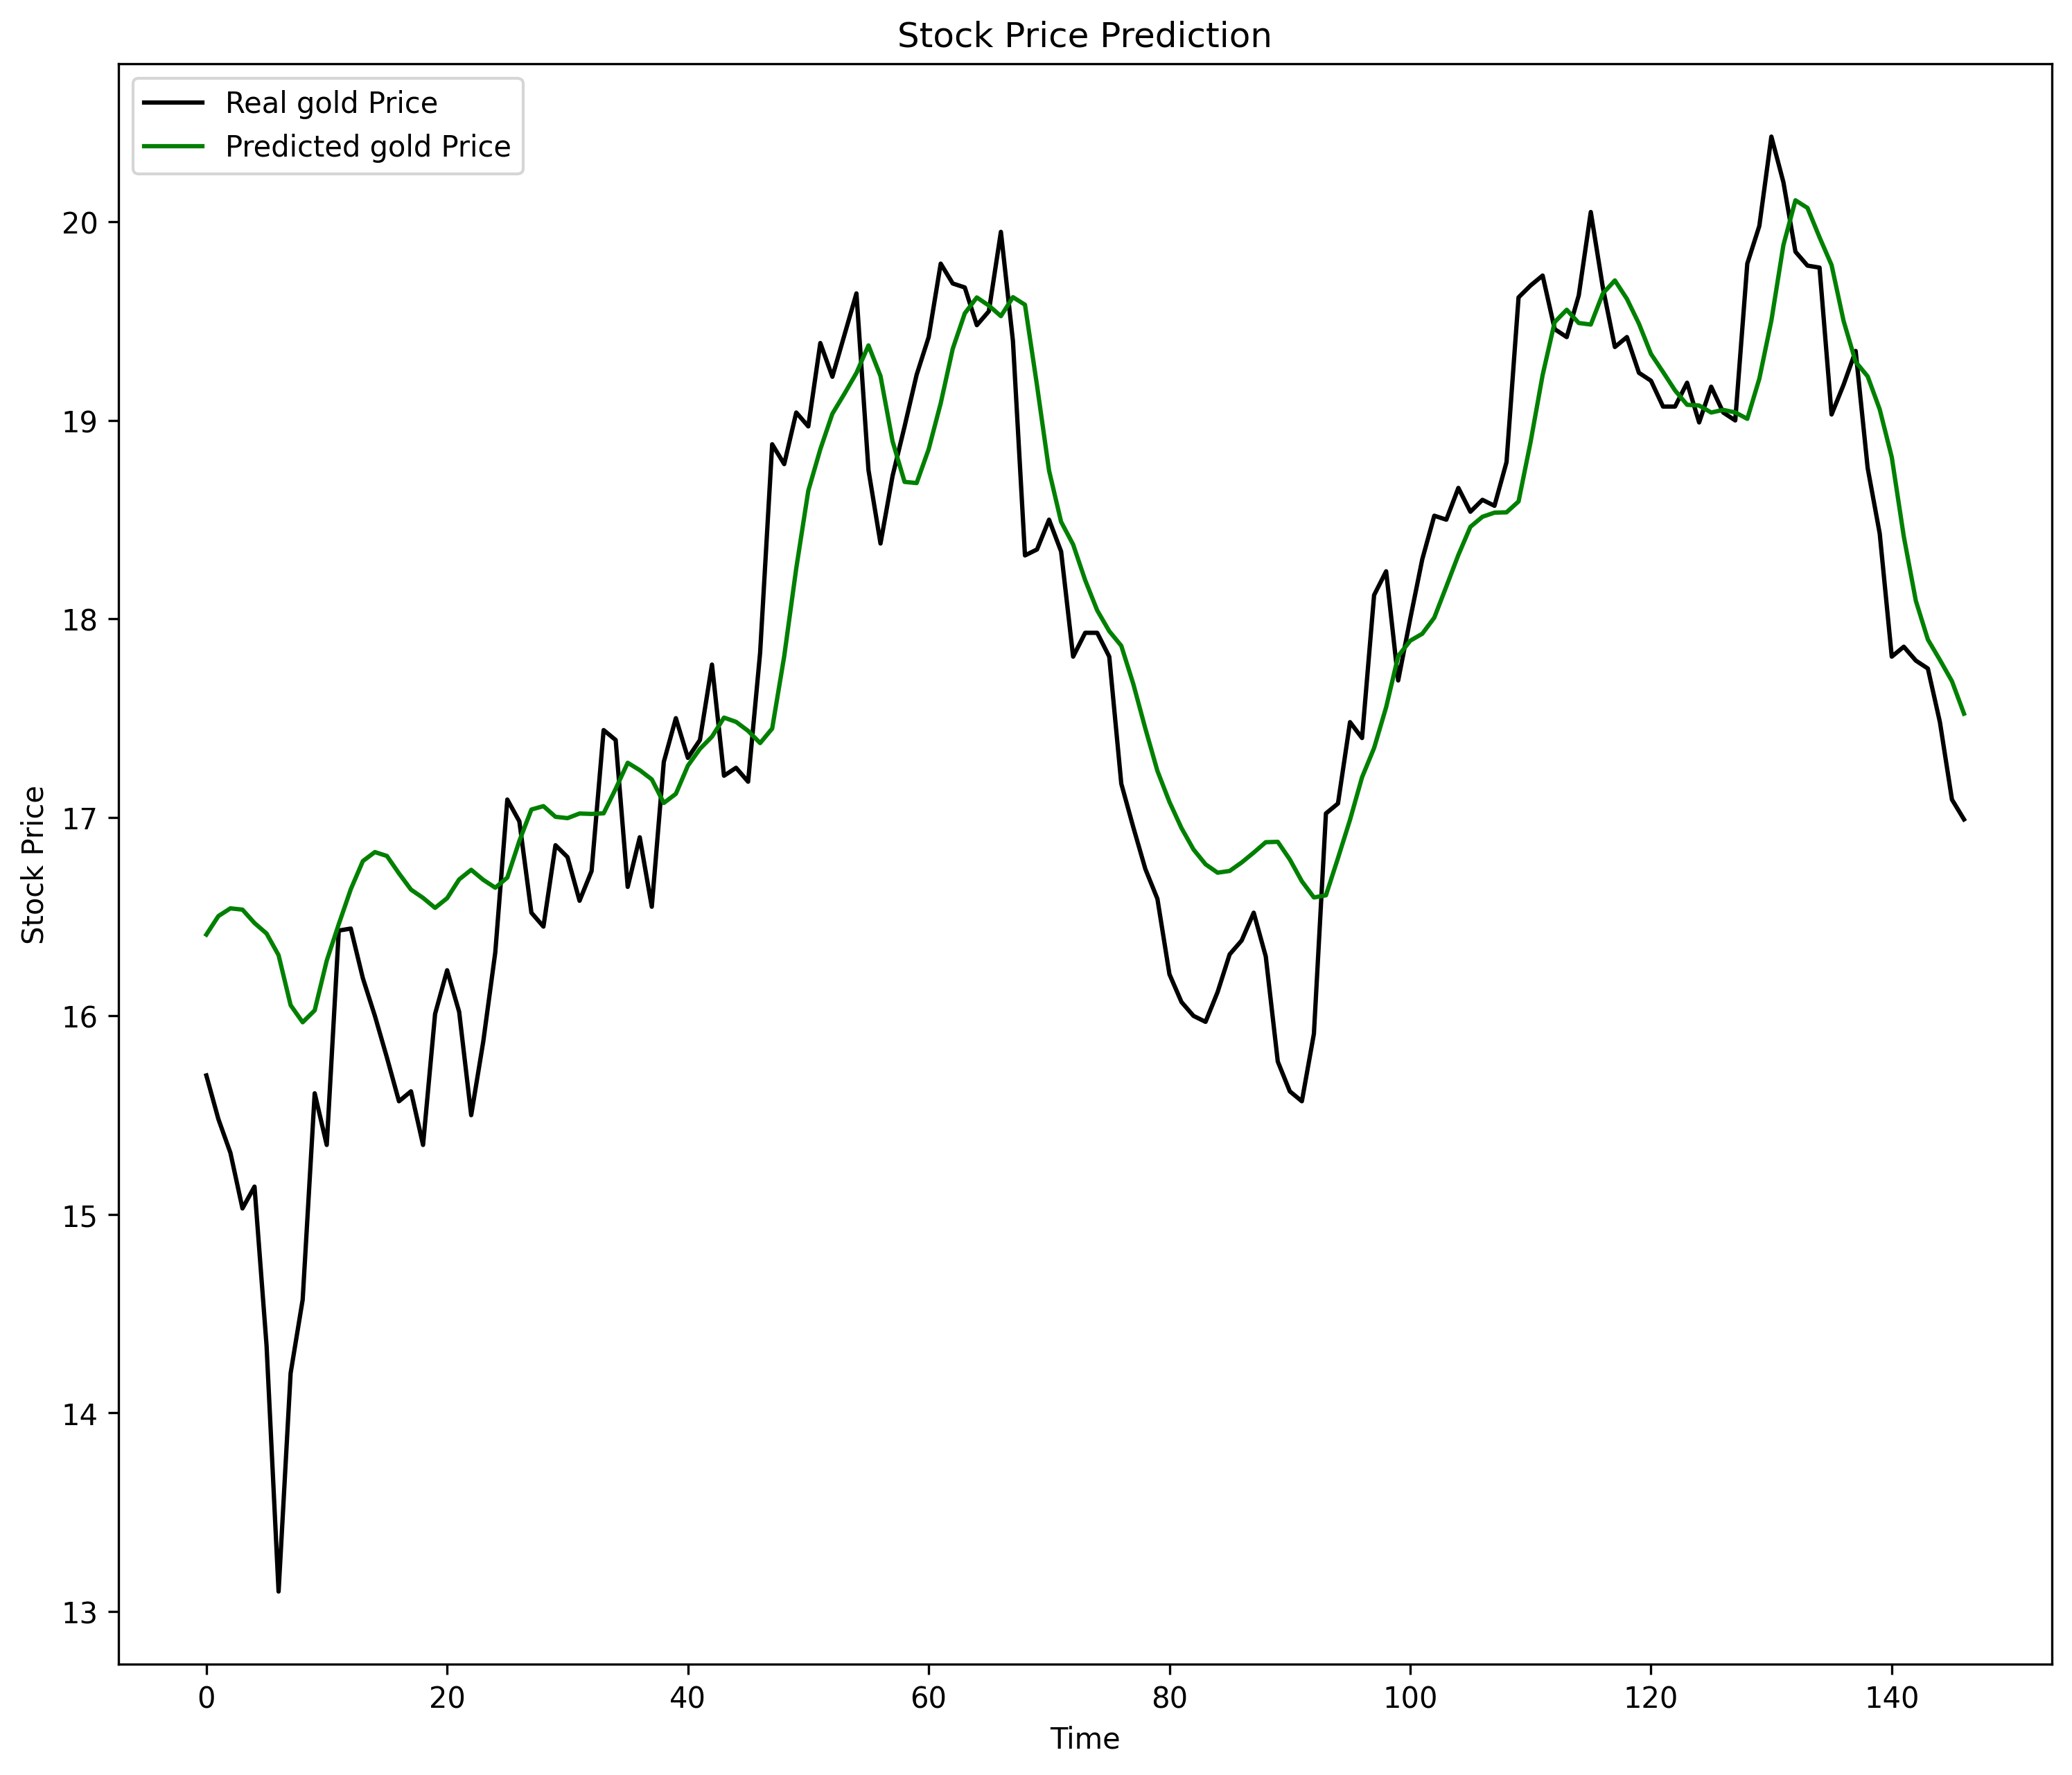

In [216]:
plt.figure(figsize=(12,10),dpi=300)
plt.plot(actual_price, color = 'black', label = 'Real gold Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted gold Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [217]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [218]:
predicted_price
actual_price

MAE=mean_absolute_error(actual_price,predicted_price)
MSE=mean_squared_error(actual_price,predicted_price,squared=True)
RMSE=mean_squared_error(actual_price,predicted_price,squared=False)
MAPE=mean_absolute_percentage_error(actual_price,predicted_price)
SMAPE=SMAPE_calulate(actual_price,predicted_price)
RAE=RAE_calculate(actual_price,predicted_price)
MRAE=MRAE_calculate(actual_price,predicted_price)
MdRAE=MdRAE_calculate(actual_price,predicted_price)
RSE=RSE_calculate(actual_price,predicted_price,Root=False)
RRSE=RSE_calculate(actual_price,predicted_price,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 0.53
MSE: 0.483
RMSE: 0.695
MAPE: 3.161 %
SMAPE: 3.094 %
RAE: 0.398
MRAE: 0.0027055236424782586
MdRAE: 0.408 bench: 17.709
RSE: 0.201
RRSE: 0.449
